This notebook converts OOF segmentation maps to binarized and resized arrays.

In [20]:
import os
import numpy as np
import cv2
import torch
import torchio as tio
from tqdm.auto import tqdm

In [2]:
OOF_SEG_DIR = '../output/OOF_segmentations/'
OOF_SEG_FNS = [os.path.join(OOF_SEG_DIR, fn) for fn in os.listdir(OOF_SEG_DIR)]
np.load(OOF_SEG_FNS[0]).shape

(1, 320, 320, 160)

In [3]:
NEW_SIZE = (256,256,100)

old_array = np.load(OOF_SEG_FNS[0])
tio_image = tio.ScalarImage(tensor=old_array)

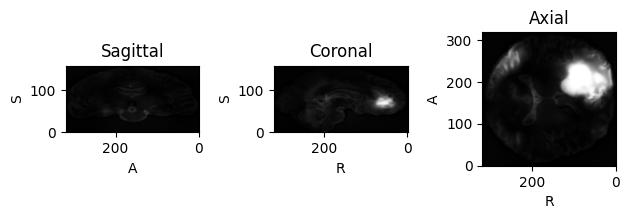

In [4]:
tio_image.plot()

In [7]:
resize = tio.Resize(target_shape=NEW_SIZE)
transform = tio.Compose([resize])

In [10]:
transform(tio_image).numpy().shape

(1, 256, 256, 100)

In [15]:
def resize_and_quantize(arr):
    tio_image = tio.ScalarImage(tensor=arr)
    resize = tio.Resize(target_shape=NEW_SIZE)
    transform = tio.Compose([resize])
    new_arr = transform(tio_image).numpy()
    bool_arr = (new_arr > 0.5).astype(np.bool)
    return bool_arr

In [16]:
old_array = np.load(OOF_SEG_FNS[0])
new_array = resize_and_quantize(old_array)

In [21]:
SAVE_DIR = '../output/OOF_segmentations_binary/'
if not os.path.exists(SAVE_DIR): os.mkdir(SAVE_DIR)

In [22]:
for fn in tqdm(OOF_SEG_FNS):
    old_array = np.load(fn)
    new_array = resize_and_quantize(old_array)
    np.save(os.path.join(SAVE_DIR, os.path.basename(fn)), new_array)

  0%|          | 0/577 [00:00<?, ?it/s]